In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [10]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [11]:
df_total = pd.DataFrame()

for i in range(17):    
    b = bioinfo.gen_df2(df['Species'][i],df['Sequence'][i],3)
    y = np.empty(len(b.index))
    y[:] = i
    b['label'] = y
    b.reset_index(drop=True, inplace=True)
    df_total.reset_index(drop=True, inplace=True)
    df_total = pd.concat([b, df_total], axis=0)   


In [12]:
df_total

,Fragment,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
0,ATGGCTTCCGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,16.0
1,ATCCTGGTGAAT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0
2,ATAAAGGAGGAG,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
3,GTGACCTGCCCC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,ATCTGCCTGGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0
5,CTACTGACAGAA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
6,CCTCTGAGCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
7,GACTGTGGCCAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,16.0
8,AGCTTCTGCCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0
9,GCATGCATCACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [13]:
from sklearn.manifold import TSNE

feat_cols = list(filter(lambda col: col != 'Fragment' and col != 'label',df_total.columns))

rndperm = np.random.permutation(2103)
n_sne = 2000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_total.loc[rndperm[:n_sne],feat_cols].values)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2139 samples in 0.007s...
[t-SNE] Computed neighbors for 2139 samples in 0.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2139
[t-SNE] Computed conditional probabilities for sample 2000 / 2139
[t-SNE] Computed conditional probabilities for sample 2139 / 2139
[t-SNE] Mean sigma: 1.377181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.963982
[t-SNE] KL divergence after 300 iterations: 1.441738


In [15]:
tsne_results

array([[-18.982546 ,   6.077975 ],
       [  6.8168097,   0.3815055],
       [  7.395459 ,   1.3081676],
       ...,
       [  7.544412 ,  -1.3671851],
       [ 13.979249 , -10.210586 ],
       [ -0.4860112,   2.4112632]], dtype=float32)

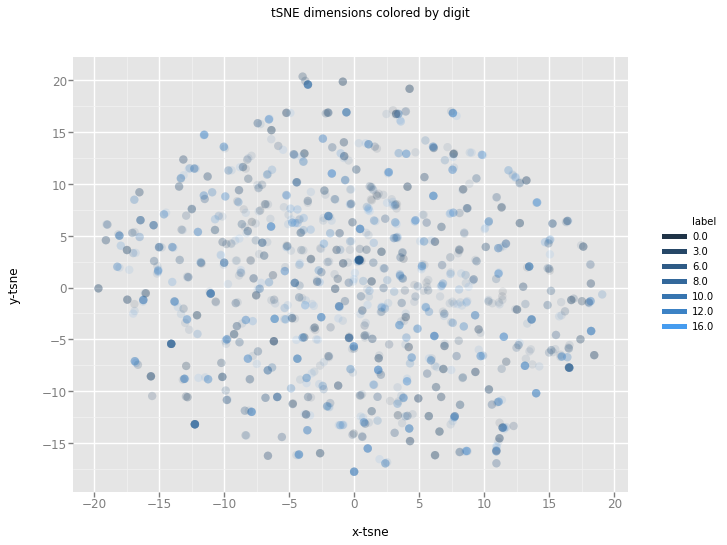

<ggplot: (8767257179228)>

In [14]:
from ggplot import *

df_tsne = df_total.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [19]:
db = DBSCAN(eps=0.3, min_samples=10).fit(tsne_results)

In [20]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [21]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

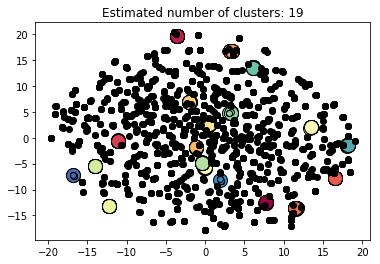

In [22]:
%matplotlib inline 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = tsne_results[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = tsne_results[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()